In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_curve, auc, precision_recall_curve, log_loss
)

# Load the uploaded CSV file into a DataFrame
file_path = '2024_Fall_BUSA695_H1FF.csv'
df = pd.read_csv(file_path)

# Define success based on course completion
df['Success'] = df['TermCoursesCompleted'] > 0

# Drop specified columns
columns_to_drop = [
    'ROWID', 'TermCoursesCompleted', 'TotalDroppedCourses', 'TotalWithdrawnCourses',
    'AttendPresent_T1', 'AttendAbsent_T1', 'TermCalculatedGPA', 
    'TermTotalCourses_T2', 'TermTotalCourses_T3', 'FirstTermStart', 'MostRecentTransferDate'
]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Impute missing values
# Impute missing numerical features with the median
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Impute missing categorical features with "Unknown"
df[categorical_features] = df[categorical_features].fillna("Unknown")

# Display the first few rows of the cleaned dataset
df.head()


Missing values per column:
 FirstTerm                  0
StudentType                0
TermCourseCredits       1346
TermTotalCourses           0
MATHCourses                0
TermFinancialAidUsed       0
CreditsTransferred         0
ClassesTransferred         0
AverageTransferGPA      2300
AgeAtStart                 0
Gender                   162
Race                    1919
Success                    0
dtype: int64


,FirstTerm,StudentType,TermCourseCredits,TermTotalCourses,MATHCourses,TermFinancialAidUsed,CreditsTransferred,ClassesTransferred,AverageTransferGPA,AgeAtStart,Gender,Race,Success
0,Fall,B,14.0,5,0,1,43.00000,16,3.333000,53,F,WH,True
1,Fall,B,10.0,5,2,0,86.00000,31,3.266000,50,F,BL,True
2,Spring,B,4.0,4,0,0,91.00000,42,2.233000,55,M,BL,True
3,Fall,B,9.0,4,0,1,126.66333,43,2.757333,55,F,WH,True
4,Summer,A,4.0,2,0,1,84.31000,32,3.153000,57,F,Unknown,True


/tmp/ipykernel_29/865979538.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_counts, x='Success', y='Total Students', palette='Blues')
/tmp/ipykernel_29/865979538.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Success', y=col, palette='Blues')
/tmp/ipykernel_29/865979538.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Success', y=col, palette='Blues')
/tmp/ipykernel_29/865979538.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

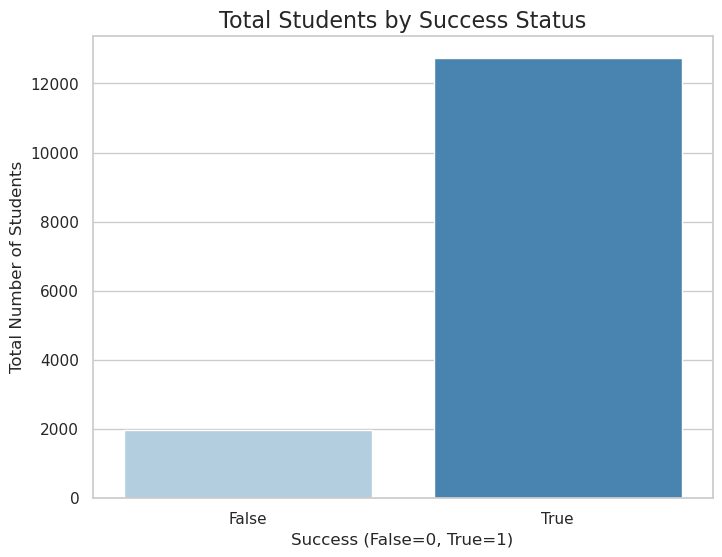

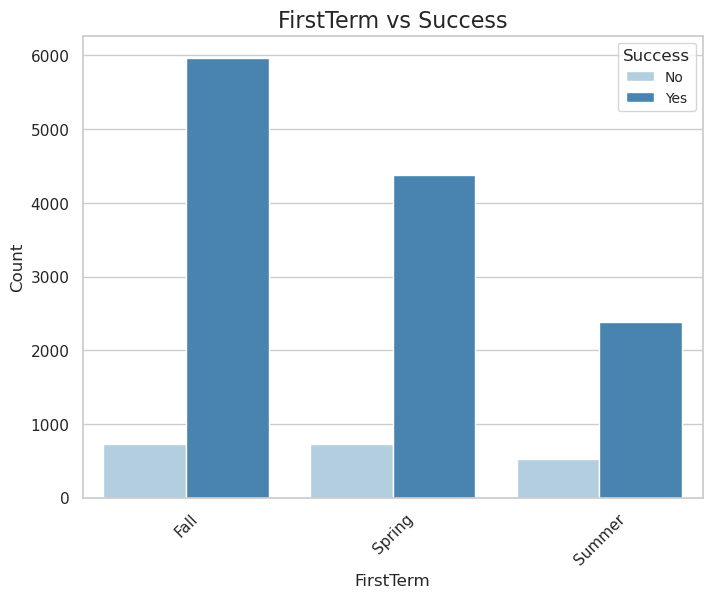

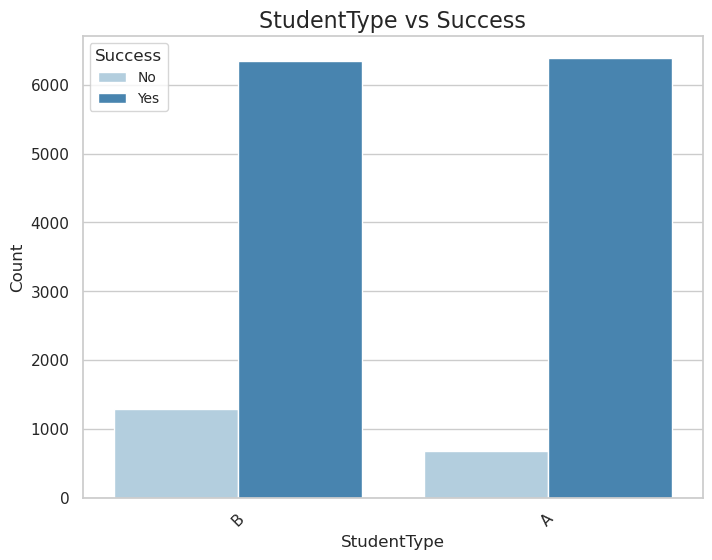

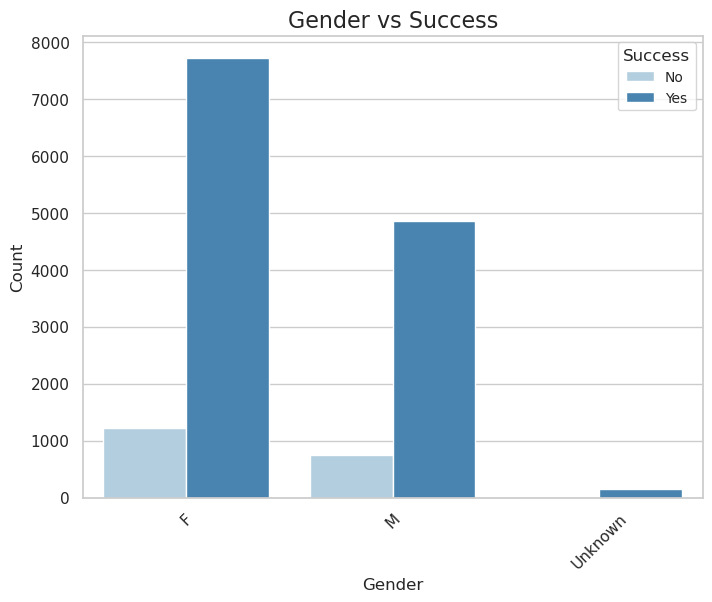

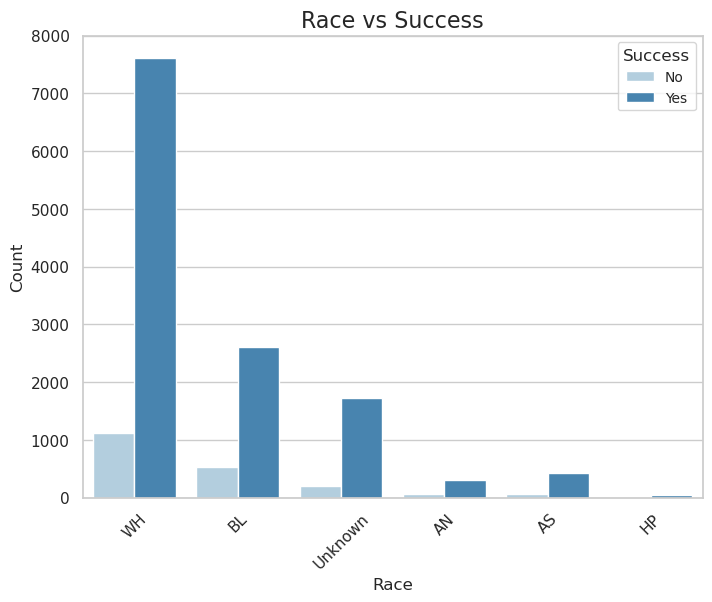

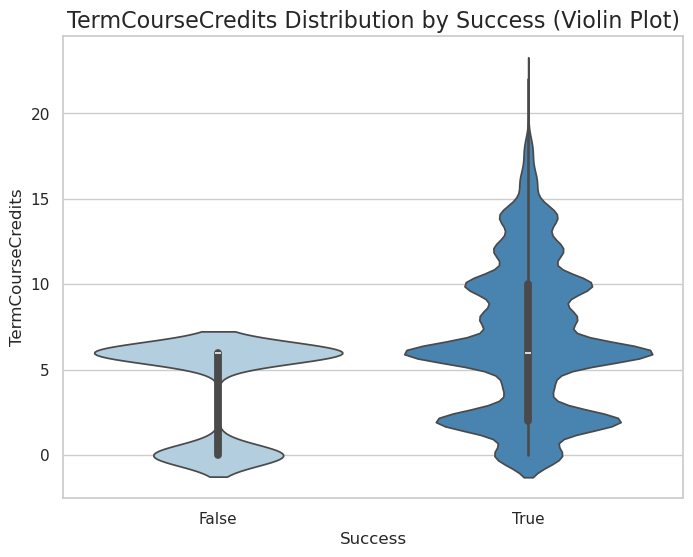

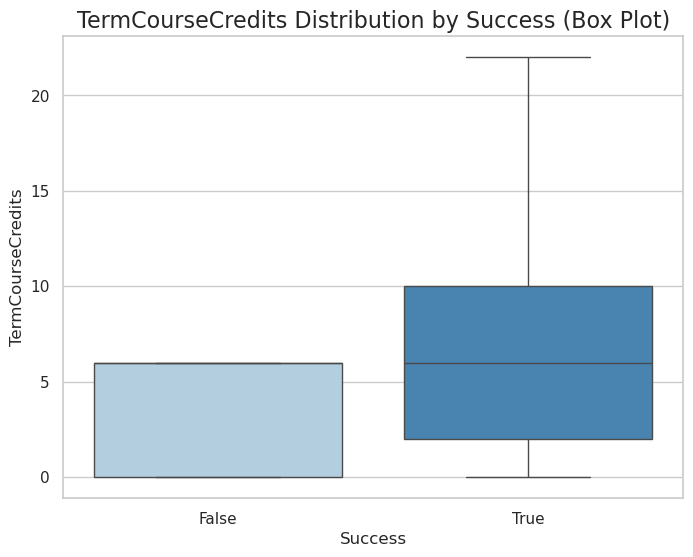

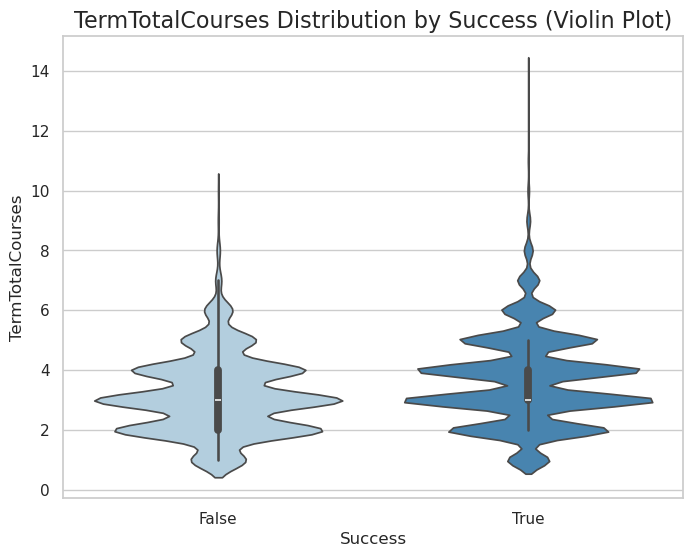

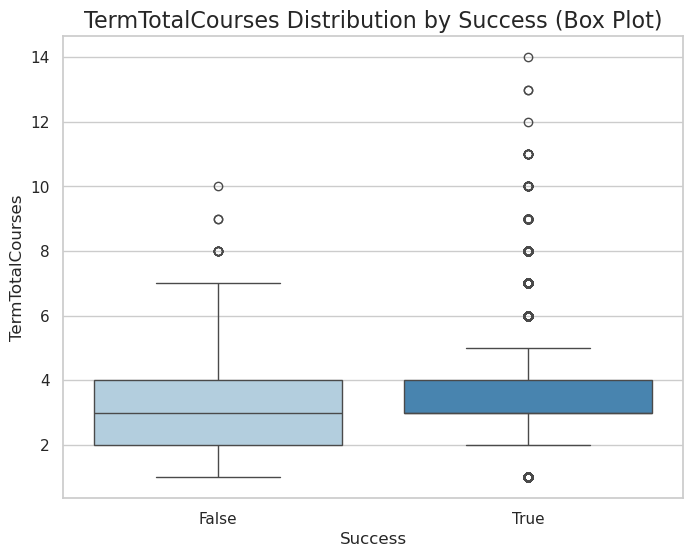

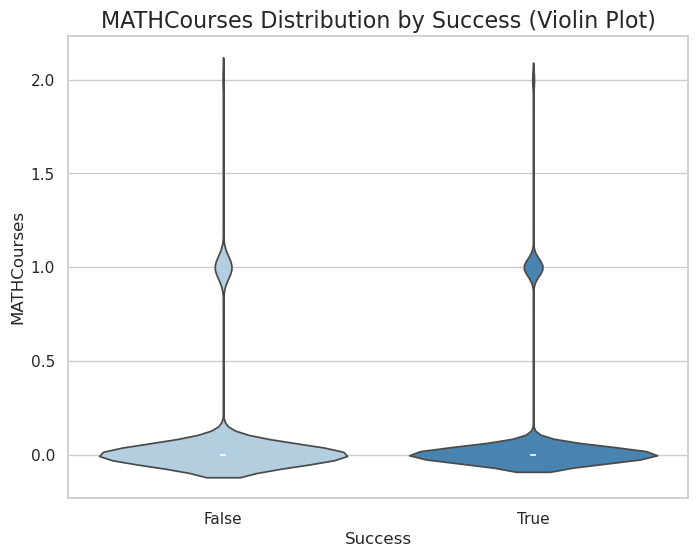

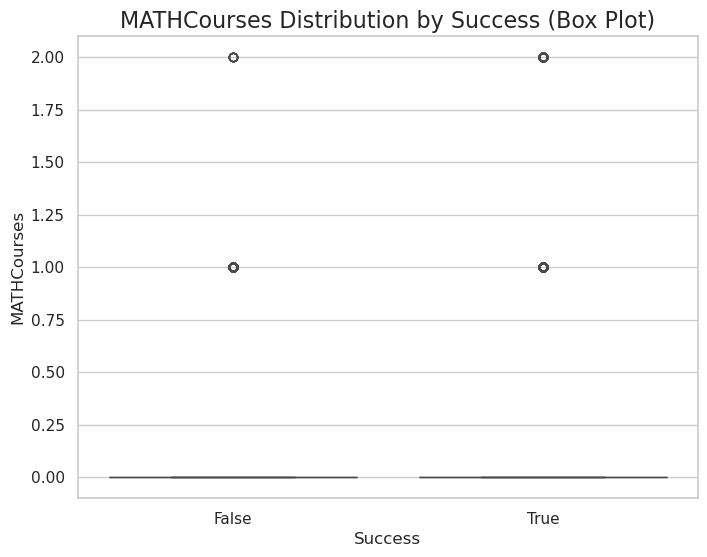

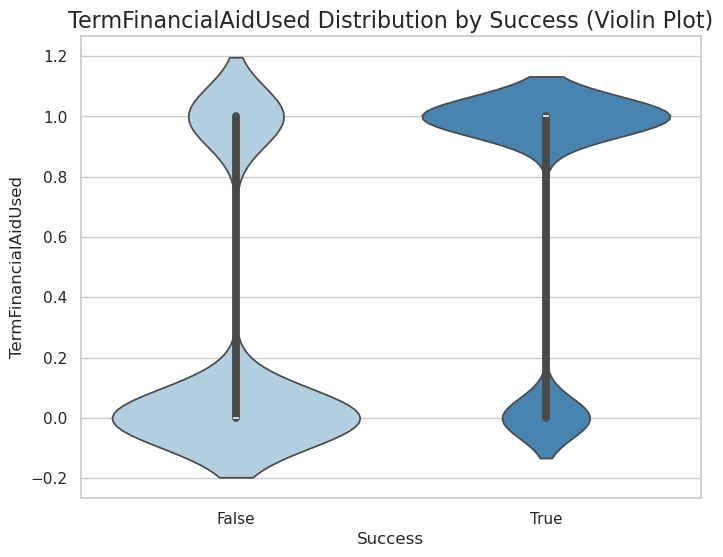

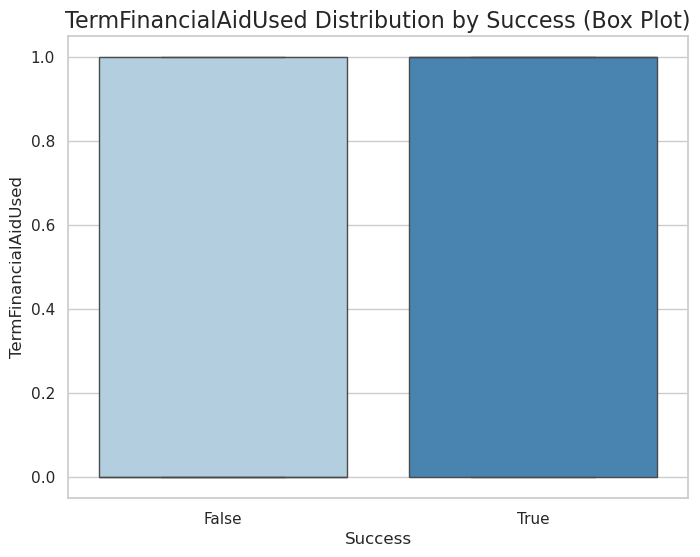

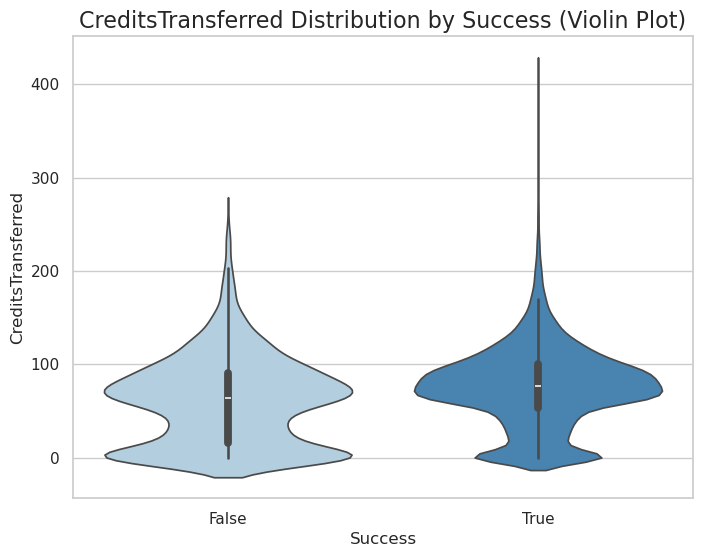

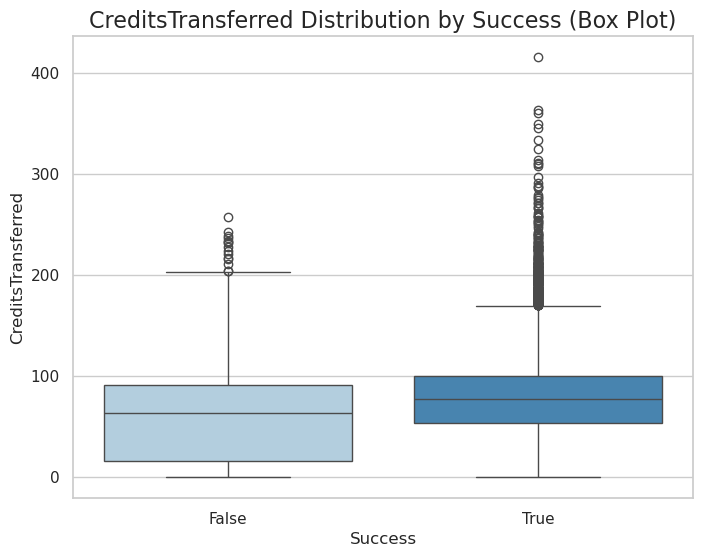

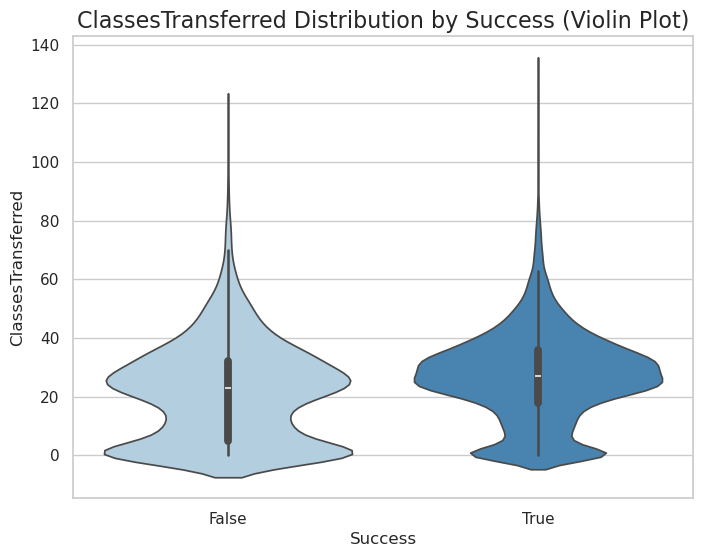

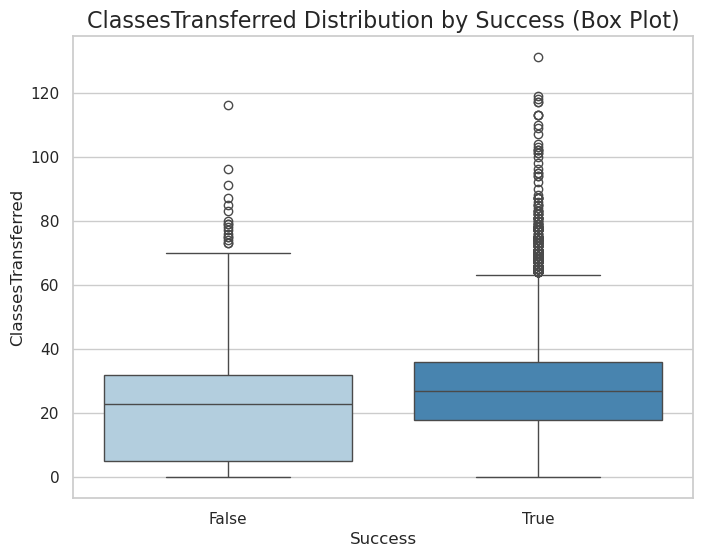

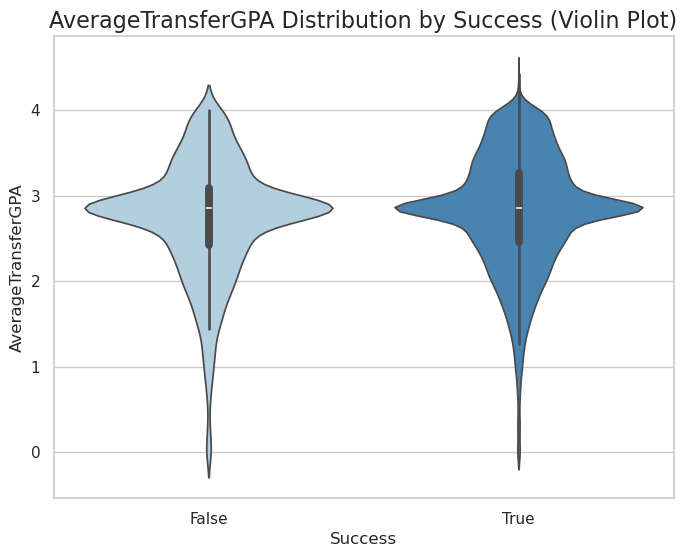

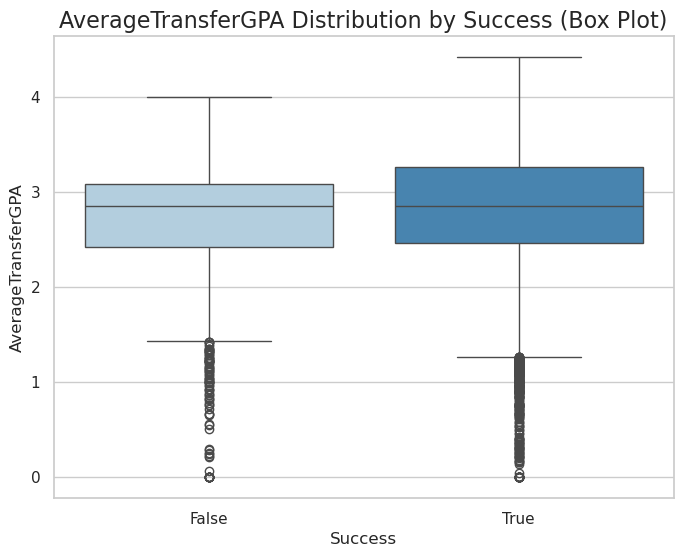

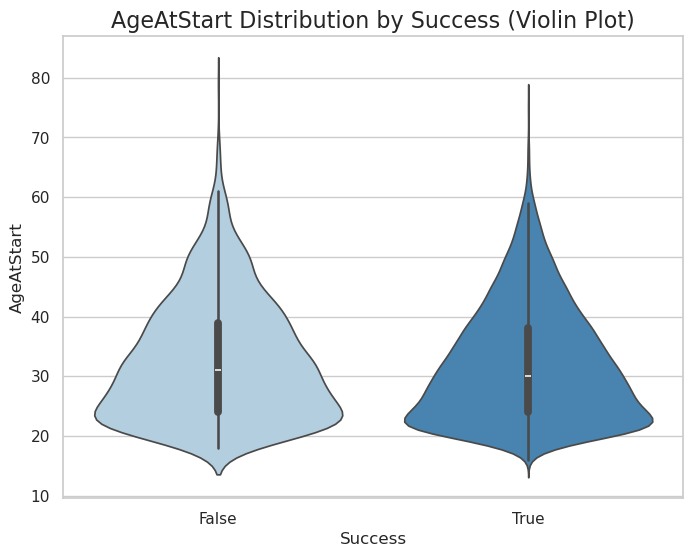

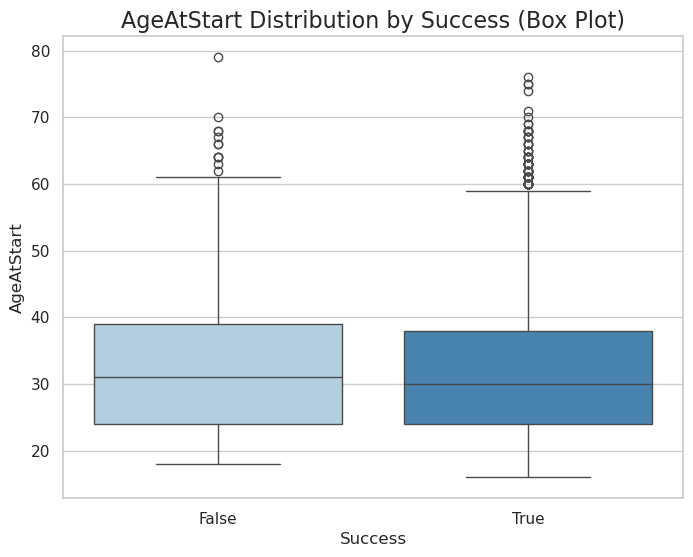

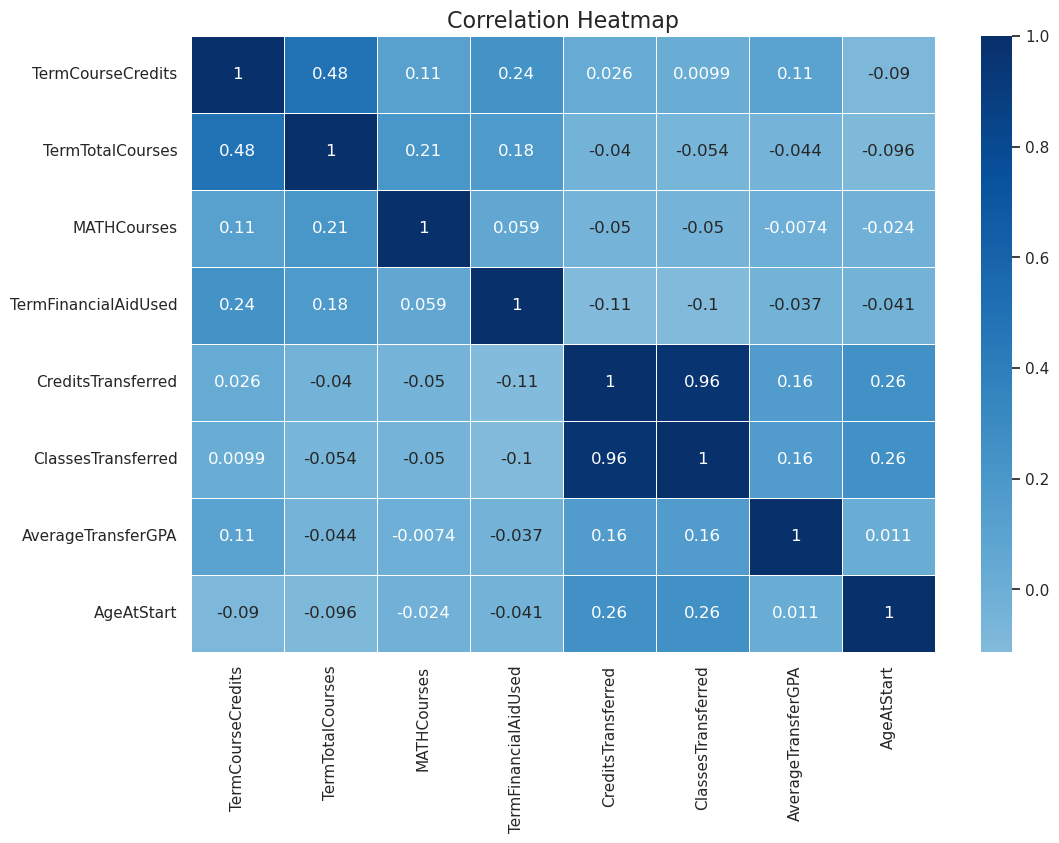

,FirstTerm,StudentType,TermCourseCredits,TermTotalCourses,MATHCourses,TermFinancialAidUsed,CreditsTransferred,ClassesTransferred,AverageTransferGPA,AgeAtStart,Gender,Race,Success
0,Fall,B,14.0,5,0,1,43.00000,16,3.333000,53,F,WH,True
1,Fall,B,10.0,5,2,0,86.00000,31,3.266000,50,F,BL,True
2,Spring,B,4.0,4,0,0,91.00000,42,2.233000,55,M,BL,True
3,Fall,B,9.0,4,0,1,126.66333,43,2.757333,55,F,WH,True
4,Summer,A,4.0,2,0,1,84.31000,32,3.153000,57,F,Unknown,True


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a consistent style for business-friendly visuals
sns.set_theme(style="whitegrid")

# Calculate total success counts
success_counts = df.groupby('Success').size().reset_index(name='Total Students')
plt.figure(figsize=(8, 6))
sns.barplot(data=success_counts, x='Success', y='Total Students', palette='Blues')
plt.title('Total Students by Success Status', fontsize=16)
plt.xlabel('Success (False=0, True=1)', fontsize=12)
plt.ylabel('Total Number of Students', fontsize=12)
plt.show()

# Perform EDA on categorical variables
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='Success', palette='Blues')
    plt.title(f'{col} vs Success', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Success', labels=['No', 'Yes'], fontsize=10)
    plt.xticks(rotation=45)
    plt.show()

# Perform EDA on numerical variables
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='Success', y=col, palette='Blues')
    plt.title(f'{col} Distribution by Success (Violin Plot)', fontsize=16)
    plt.xlabel('Success', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Success', y=col, palette='Blues')
    plt.title(f'{col} Distribution by Success (Box Plot)', fontsize=16)
    plt.xlabel('Success', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

# Ensure to use only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns

# Generate correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()  # Only numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Display the first few rows of the cleaned dataset
df.head()


In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame and 'Success' is the target variable
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['Success'])
y = df['Success']

# Split the data into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the column transformer to apply OneHotEncoder to categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# We create a column transformer that applies OneHotEncoder to categorical features
# and keeps numerical features as they are (without scaling for now)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # One-hot encode categorical features
        ('num', 'passthrough', numerical_features)  # Keep numerical features as they are
    ])

# Create a pipeline that first transforms the data and then fits the model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Logistic Regression
])

# Initialize and train the Logistic Regression model using the pipeline
logreg_pipeline.fit(X_train, y_train)

# Make predictions with the Logistic Regression model
y_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest Model with a similar pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))  # Random Forest Classifier
])

# Initialize and train the Random Forest Classifier model
rf_pipeline.fit(X_train, y_train)

# Make predictions with the Random Forest Classifier model
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the Random Forest Classifier model
print("Random Forest Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Model Evaluation:
Accuracy: 0.8536
Precision: 0.8728
Recall: 0.9722
F1 Score: 0.9198
Confusion Matrix:
[[  61  540]
 [ 106 3706]]
Classification Report:
              precision    recall  f1-score   support

       False       0.37      0.10      0.16       601
        True       0.87      0.97      0.92      3812

    accuracy                           0.85      4413
   macro avg       0.62      0.54      0.54      4413
weighted avg       0.80      0.85      0.82      4413

Random Forest Classifier Model Evaluation:
Accuracy: 0.9139
Precision: 0.9446
Recall: 0.9565
F1 Score: 0.9505
Confusion Matrix:
[[ 387  214]
 [ 166 3646]]
Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.64      0.67       601
        True       0.94      0.96      0.95      3812

    accuracy                           0.91      4413
   macro avg       0.82      0.80      0.81      4413
weighted avg       0.91      0.91      0.91      4

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming 'df' is your DataFrame and 'Success' is the target variable
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['Success'])
y = df['Success']

# Split the data into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the column transformer to apply OneHotEncoder to categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # One-hot encode categorical features
        ('num', 'passthrough', numerical_features)  # Keep numerical features as they are
    ])

# Create pipelines for Logistic Regression and Random Forest with class weights
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100))
])

# Hypertuning Logistic Regression
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

logreg_cv = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='f1')
logreg_cv.fit(X_train, y_train)

# Evaluate best Logistic Regression model
y_pred_logreg = logreg_cv.best_estimator_.predict(X_test)
print("Best Logistic Regression Model Evaluation:")
print(f"Best Params: {logreg_cv.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Hypertuning Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

rf_cv = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='f1')
rf_cv.fit(X_train, y_train)

# Evaluate best Random Forest model
y_pred_rf = rf_cv.best_estimator_.predict(X_test)
print("Best Random Forest Classifier Model Evaluation:")
print(f"Best Params: {rf_cv.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


/usr/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  w

Best Logistic Regression Model Evaluation:
Best Params: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
Accuracy: 0.7709
Precision: 0.9841
Recall: 0.7469
F1 Score: 0.8492
Confusion Matrix:
[[ 555   46]
 [ 965 2847]]
Classification Report:
              precision    recall  f1-score   support

       False       0.37      0.92      0.52       601
        True       0.98      0.75      0.85      3812

    accuracy                           0.77      4413
   macro avg       0.67      0.84      0.69      4413
weighted avg       0.90      0.77      0.80      4413

Best Random Forest Classifier Model Evaluation:
Best Params: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Accuracy: 0.9177
Precision: 0.9655
Recall: 0.9384
F1 Score: 0.9517
Confusion Matrix:
[[ 473  128]
 [ 235 3577]]
Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.79      0.72       601
        True       0.